In [676]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [677]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

pd.options.display.float_format = '{:20,.0f}'.format
pd.options.display.max_columns = 99
np.random.seed(42)

In [678]:
parking = pd.read_csv('실전db.csv', encoding='cp949')

In [679]:
parking = parking.rename(columns=str.lower)

In [680]:
parking.describe()

,user_id,store_id,count
count,"879,271","879,271","879,271"
mean,"1,206,566","149,600",1
std,"420,653","68,898",1
min,224,4,1
25%,"900,576","92,437",1
50%,"1,321,440","173,059",1
75%,"1,542,416","220,661",1
max,"1,830,598","231,465",61


In [681]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     879271 non-null  int64 
 1   join_date   879271 non-null  object
 2   d_type      879271 non-null  object
 3   store_id    879271 non-null  int64 
 4   goods_type  879271 non-null  object
 5   date        879271 non-null  object
 6   count       879271 non-null  int64 
 7   ad1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [682]:
parking.head()

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [683]:
# Unix time error
parking[(parking['join_date'] == '1970-01-01')]

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP
...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN


In [684]:
parking = parking[~(parking['join_date']=='1970-01-01')]
parking = parking[parking['user_id'] != 999665]

#### 🚫 결측치, 이상치 확인

+ 결측치 : 없음
+ 이상치 : 
 - join_date == 1970-01-01 데이터는 치환 없이 삭제하기로 결정 (5.10 회의)
 - user_id == 999665 데이터는 비상식적인 결제량 정보를 담고 있으므로 제거 (찬서님 의견 + 코드)
 
#### 🚙 변수들의 값을 파악하기 위한 EDA 진행

In [685]:
# count
parking['count'].value_counts()

1     862704
2      13500
3       1058
4        270
5        133
6         63
7         36
9         12
8         11
10         6
15         4
11         3
12         3
13         3
23         2
22         1
17         1
19         1
20         1
Name: count, dtype: int64

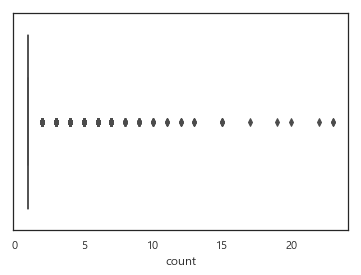

In [686]:
sns.boxplot(x = "count",
            data = parking)
plt.show()

C:\Users\hwang\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Suppor

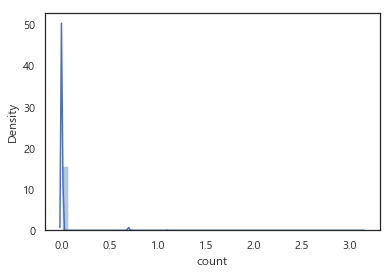

In [687]:
# count 빈도 log
sns.distplot(np.log(parking['count']));

C:\Users\hwang\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hwang\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Suppor

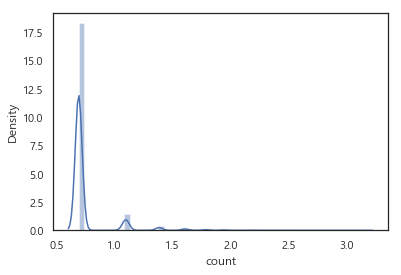

In [688]:
# count != 1 빈도
withoutcount1 = parking.drop(parking[parking['count'] == 1].index)
sns.distplot(np.log(withoutcount1['count']));

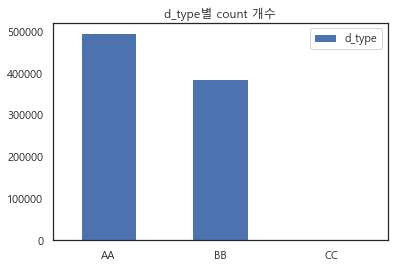

In [689]:
# d_type
countbytypes = pd.DataFrame(parking['d_type'].value_counts())
countbytypes.plot(kind = 'bar', title = 'd_type별 count 개수', rot = 0);

In [690]:
parking['d_type'].value_counts()

AA    493166
BB    384541
CC       105
Name: d_type, dtype: int64

In [691]:
# d_type이 user_id에 1:1 대응되는 모습
parking.groupby('user_id')['d_type'].value_counts()

user_id  d_type
224      AA         2
232      BB        23
342      AA         1
565      AA         2
729      AA         1
                   ..
1830551  BB         1
1830570  BB         1
1830580  AA         1
1830589  BB         1
1830598  AA         1
Name: d_type, Length: 165160, dtype: int64

In [692]:
parking.groupby('store_id')['d_type'].value_counts()

store_id  d_type
4         AA        13
          BB        12
8         BB        28
          AA        19
161       BB         3
                    ..
231444    AA         1
231453    AA        14
          BB         8
231465    AA        10
          BB         4
Name: d_type, Length: 2023, dtype: int64

In [693]:
# goods_type
parking['goods_type'].value_counts()

A    608732
C    130928
B    118409
D     19743
Name: goods_type, dtype: int64

In [694]:
# date별 goods_type의 패턴
parking.groupby(['date', 'goods_type']).size().unstack(fill_value=0).loc['2020-01-01':'2020-01-31',:]

goods_type,A,B,C,D
date,,,,
2020-01-01,659,34,210,19
2020-01-02,919,303,197,56
2020-01-03,902,503,268,46
2020-01-04,1550,144,452,37
2020-01-05,1063,56,350,27
2020-01-06,949,275,190,45
2020-01-07,1018,346,224,33
2020-01-08,994,436,195,33
2020-01-09,985,432,255,42


C:\Users\hwang\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hwang\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hwang\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hwang\Anaconda3\

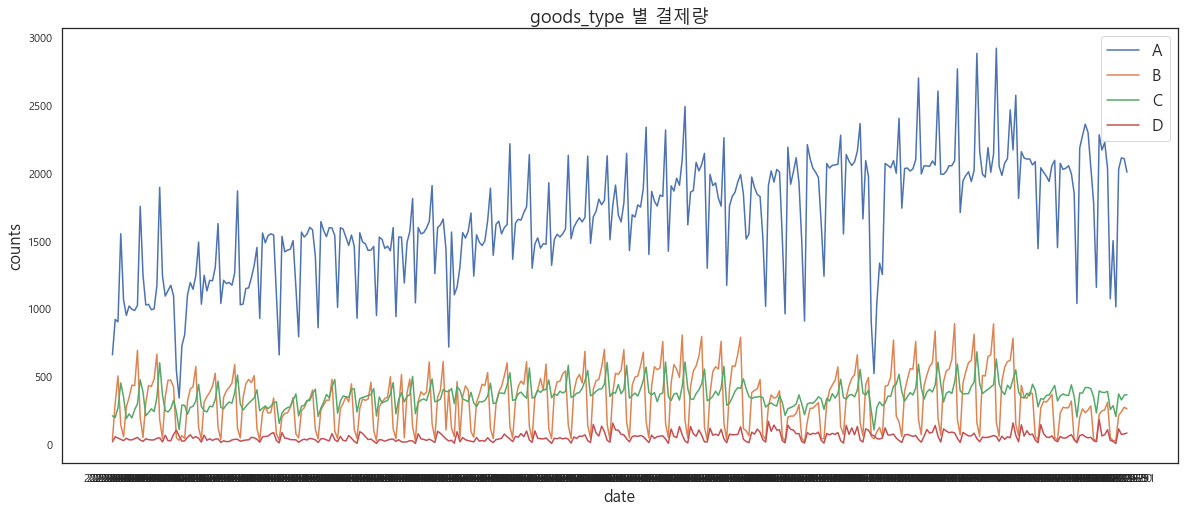

In [695]:
# goods_type 별 결제량 시각화
countbydate = parking.groupby(['date', 'goods_type']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(countbydate.index, countbydate['A'])
sns.lineplot(countbydate.index, countbydate['B'])
sns.lineplot(countbydate.index, countbydate['C'])
sns.lineplot(countbydate.index, countbydate['D'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=16)
plt.title('goods_type 별 결제량', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = None)
plt.show()


In [696]:
parking.groupby(['store_id', 'ad1']).size().unstack(fill_value=0).head(20)

ad1,0,ABP,ADS,AOI,BF,BHW,BI,BJG,BO,BOI,BP,BUD,CAS,CCA,CD,CN,COI,CU,CVB,CY,DB,DIV,DJ,DM,DOI,DSO,EP,GAS,GAY,GB,GBC,GD,GEJ,GGC,GGM,GGY,GHN,GJ,GKP,GN,GPJ,GR,GS,GSN,GSW,GW,GYI,IND,IYS,J,JR,JRR,MP,NO,NW,P,PJP,Q,QGI,QH,R,RRR,SB,SC,SD,SDU,SG,SJV,SOD,SOI,SP,VO,VU,WAE,WF,WH,WOID,WT,X,YC,YD,YO,ZE,ZP
store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [697]:
parking['store_id'].value_counts()

220557    17602
220893    17203
220655    16267
220848    15924
92437     15823
          ...  
220018        1
225667        1
231135        1
230196        1
231004        1
Name: store_id, Length: 1060, dtype: int64

In [698]:
parking['ad1'].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'WH', 'GR',
       'X', 'CVB', 'ADS', 'VO'], dtype=object)

### 🚙EDA를 통해 파악한 변수와 카테고리 값의 내용은 아래와 같다.

1. count : 결제 건수
<br>종속 변수인 결제 건수. 원래는 하루 20 ~ 61 건인 모습도 있었으나 이상치 제거를 해주고 나서 그런 경향이 줄어든 모습이다.
<br><br>
2. join_date : 가입일
<br>가입 날짜에서 얼마나 오래된 유저인지 파악할 수 있겠다. 몇 년차로 볼 수도 있겠지만 몇 개월차로 보는 것이 바람직해 보인다.
<br><br>
3. d_type : 결제 수단
<br>처음엔 값이 3개인게 제휴/공유/사설주차장으로 나눠지는 주차장 정보일 것이라고 생각했다. 하지만 count가 결제 건수인데 사설 주차장은 위치 정보만 제공하고 결제는 할 수 없다. 따라서 주차장 정보는 아닐 것이다. 3개로 나눠지는 정보가 뭐가 있나 **모두의 주차장 앱**을 찾아보니 결제 수단인 것으로 판단된다. 결제 수단은 카드/네이버페이/휴대폰 결제 이렇게 나누어진다. <br>
**+ 추가**<br>
회의 때, 준식님과 찬서님이 store_id별 매칭으로 보여서 주차장 정보일 것 같다고 말씀해주셨습니다. 그리고 제휴/공유/사설로 나눠지는게 아니라 제휴/공유/거주지우선 이렇게 3개 정보로 나눠지는 것 같다고 말씀해주셔서 확인해봤습니다. 확인 결과 store_id 별 매칭은 1:n이고, user_id 별 매칭은 1:1이었습니다. 따라서 결제 수단일 가능성이 더 높을 것 같습니다. 사람마다 결제 수단이 매번 다를 수 있는데도 1:1 매칭이 되는 이유는 정확하게 모르겠지만, 본인이 편하게 쓰는 방법을 굳이 바꾸지 않으려는 심리적 요인이 있는 것 같습니다.
<br><br>
4. ad1 : 서울 지역 코드
<br>GN은 강남 J는 중구 같다는 팀 회의 아이디어를 듣고 서울시 행정구역 코드라고 생각했으나 값이 85개라 서울시 행정구역 코드는 아닌 것으로 보인다. 그렇다고 전국 지역 코드라고는 보이지 않는게 함께 주어진 교통량 데이터가 서울지역만 있다. 그래서 서울 지역 코드인듯.
<br><br>
5. store_id : 지역 코드 세분 번호
<br>강남1, 강남2 이런 식으로 지역 세분화 하는 넘버가 store_id인 것으로 보인다. GN 밑에 여러 store_id가 들어가는데, store_id가 여러 GN에 들어가지 않는다. 1:n 관계
<br><br>
6. goods_type : 판매권
<br>판매권은 값이 4개 이상이다. 당일권, 시간제, 심야, 야간, 월별 주차권 등이 있다. goods_type은 이런 것들을 뭉뚱그려 합친 것으로 A, B, C, D가 각각 제휴주간, 제휴야간, 공유주간, 공유야간 주차권의 합으로 보인다. 이유는 날짜별 데이터를 보고 파악했는데, A와 C는 토요일에 증가하는 반면 B와 D는 금요일에 증가하고 일요일에 바닥을 친다. 이렇게 A와 C, B와 D가 비슷한 모습을 보이는데 제휴 주차장과 공유 주차장의 규모 차이가 있는게 이렇게 나타나는 것으로 파악했다.
<br><br>

|구분|주간|야간|
|---|---|---|
|제휴|A|B|
|공유|C|D|



#### 🔧Feature Engineering 을 진행하기 전 먼저 train과 test 데이터를 분류해준다.

In [699]:
# train, test
train = parking[parking.date <= '2020-09-30']
test = parking[parking.date > '2020-09-30']
display(train, test)

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
623574,1709914,2020-09-30,BB,221022,B,2020-09-30,1,GN
623575,1709935,2020-09-30,AA,725,B,2020-09-30,1,MP
623576,1709942,2020-09-30,AA,223058,B,2020-09-30,1,BF
623577,1709950,2020-09-30,BB,182320,A,2020-09-30,2,JRR


,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
623579,15521,2014-09-12,AA,182320,A,2020-10-01,1,JRR
623580,17651,2014-09-19,BB,82434,D,2020-10-01,1,J
623581,26388,2014-10-25,BB,182320,A,2020-10-01,1,JRR
623582,81772,2015-05-02,BB,204438,A,2020-10-01,1,DJ
623583,92258,2015-05-24,AA,220745,A,2020-10-01,1,SD
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


#### 🔧Feature Engineering 진행

In [700]:
weather_data = pd.read_csv('서울시_기상데이터.csv', encoding='cp949')
weather_data.dtypes

지점        int64
일시       object
기온      float64
강수량     float64
풍속      float64
습도        int64
일조시간    float64
적설량     float64
지면온도    float64
지중온도    float64
dtype: object

In [701]:
weather_data['일시'] = weather_data['일시'].astype('datetime64')
weather_data['date'] = weather_data['일시'].dt.date
weather_data['기온'] = weather_data['기온'].fillna(30)
weather_data = weather_data.fillna(0)
display(weather_data, weather_data.isna().sum())

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,date
0,108,2020-01-01 01:00:00,-6,0,2,40,0,0,-2,3,2020-01-01
1,108,2020-01-01 02:00:00,-6,0,0,42,0,0,-2,3,2020-01-01
2,108,2020-01-01 03:00:00,-6,0,0,46,0,0,-3,3,2020-01-01
3,108,2020-01-01 04:00:00,-5,0,0,50,0,0,-2,3,2020-01-01
4,108,2020-01-01 05:00:00,-5,0,0,55,0,0,-2,3,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00:00,-12,0,5,54,0,0,-6,2,2020-12-30
8756,108,2020-12-30 21:00:00,-12,0,3,58,0,0,-7,2,2020-12-30
8757,108,2020-12-30 22:00:00,-13,0,3,56,0,0,-7,2,2020-12-30
8758,108,2020-12-30 23:00:00,-13,0,2,54,0,0,-7,2,2020-12-30


지점      0
일시      0
기온      0
강수량     0
풍속      0
습도      0
일조시간    0
적설량     0
지면온도    0
지중온도    0
date    0
dtype: int64

In [702]:
# 일교차 정보를 가지고 있는 Tdata 생성
Tdata = pd.DataFrame(weather_data.groupby('date')['기온'].agg(np.ptp)).reset_index()
Tdata = Tdata.rename(columns = {'기온': 'temp_diff'}, inplace = False)
Tdata.loc[365, 'temp_diff'] = 7.9
Tdata

,date,temp_diff
0,2020-01-01,6
1,2020-01-02,4
2,2020-01-03,8
3,2020-01-04,9
4,2020-01-05,10
...,...,...
361,2020-12-27,8
362,2020-12-28,7
363,2020-12-29,10
364,2020-12-30,7


In [703]:
weather_mean = weather_data.groupby('date').mean()
weather_mean

,지점,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
date,,,,,,,,,
2020-01-01,108,-3,0,1,63,0,0,-1,3
2020-01-02,108,1,0,2,65,0,0,-0,3
2020-01-03,108,0,0,2,58,0,0,-1,3
2020-01-04,108,1,0,2,51,0,0,-0,3
2020-01-05,108,1,0,1,46,0,0,-1,3
...,...,...,...,...,...,...,...,...,...
2020-12-27,108,5,0,2,63,0,0,1,2
2020-12-28,108,7,0,1,71,0,0,3,2
2020-12-29,108,1,0,3,72,0,0,-0,3


In [704]:
# 평균 기온과 날씨 변수 생성
weather_mean['weather'] = np.where(weather_mean["강수량"].values >= 0.1 , "rain", np.where(weather_mean['적설량'].values > 0, 'snow', 'none'))
weather_mean = weather_mean.rename(columns = {'기온': 'mean_temp'}, inplace = False)

In [705]:
weather_mean['weather'].value_counts()

none    294
rain     62
snow     10
Name: weather, dtype: int64

In [706]:
# 강수량 데이터를 보면 2월 16일부터 18일까지 비가 왔는데 16일에 적설량은 0이다.
# 따라서 16일 날씨는 비, 17, 18일은 눈이 왔다고 예측할 수 있는데, weather에 예측한대로 데이터가 들어갔는지 확인
weather_mean.iloc[40:50,:]

,지점,mean_temp,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,weather
date,,,,,,,,,,
2020-02-10,108,4,0,2,51,0,0,3,3,none
2020-02-11,108,6,0,2,39,0,0,3,3,none
2020-02-12,108,7,0,2,69,0,0,6,4,rain
2020-02-13,108,7,0,2,85,0,0,7,5,none
2020-02-14,108,8,0,1,71,0,0,7,6,none
2020-02-15,108,10,0,3,62,0,0,7,6,none
2020-02-16,108,-1,1,4,83,0,2,2,6,rain
2020-02-17,108,-6,0,3,67,0,3,0,5,snow
2020-02-18,108,-4,0,2,44,0,1,-0,4,snow


In [707]:
weather_mean = weather_mean.rename_axis('date').reset_index()

In [708]:
weather_data2 = pd.merge(Tdata, weather_mean[['date', 'weather', 'mean_temp']], how = 'left', on = 'date')

In [709]:
weather_data2.loc[365, 'mean_temp'] = -8.9
weather_data2

,date,temp_diff,weather,mean_temp
0,2020-01-01,6,none,-3
1,2020-01-02,4,none,1
2,2020-01-03,8,none,0
3,2020-01-04,9,none,1
4,2020-01-05,10,none,1
...,...,...,...,...
361,2020-12-27,8,none,5
362,2020-12-28,7,none,7
363,2020-12-29,10,none,1
364,2020-12-30,7,none,-10


In [710]:
parking['date'] = parking['date'].astype('datetime64')
weather_data2['date'] = weather_data2['date'].astype('datetime64')
parking = pd.merge(parking, weather_data2, how = 'left', on = 'date')

In [711]:
parking

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,temp_diff,weather,mean_temp
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,6,none,-3
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,6,none,-3
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,6,none,-3
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,6,none,-3
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,6,none,-3
...,...,...,...,...,...,...,...,...,...,...,...
877807,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,8,none,-9
877808,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,8,none,-9
877809,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,8,none,-9
877810,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,8,none,-9


In [712]:
# feature engineering
# 기본 날짜 데이터 쪼개기
parking['year'] = parking['date'].dt.year
parking['month'] = parking['date'].dt.month
parking['day'] = parking['date'].dt.day
parking['weekday'] = parking['date'].dt.weekday
parking['week'] = parking['date'].dt.isocalendar().week

# 공휴일 추가
parking['isholiday'] = parking['date'].isin(['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25'])

# 몇개월차 유저?
# 0개월차 유저를 없애주기 위해 구매날짜 - 가입날짜 + 1
parking['join_date'] = parking['join_date'].astype('datetime64')
parking['howlonguser'] = (parking['year']*12 + parking['month']) - (parking['join_date'].dt.year*12 + parking['join_date'].dt.month) + 1

In [713]:
parking

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,temp_diff,weather,mean_temp,year,month,day,weekday,week,isholiday,howlonguser
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,6,none,-3,2020,1,1,2,1,True,73
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,6,none,-3,2020,1,1,2,1,True,72
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,6,none,-3,2020,1,1,2,1,True,63
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,6,none,-3,2020,1,1,2,1,True,62
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,6,none,-3,2020,1,1,2,1,True,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877807,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,8,none,-9,2020,12,31,3,53,False,1
877808,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,8,none,-9,2020,12,31,3,53,False,1
877809,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,8,none,-9,2020,12,31,3,53,False,1
877810,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,8,none,-9,2020,12,31,3,53,False,1


#### Feature Engineering 내용 정리

1. 주어진 서울시 기상데이터 csv 파일로 `weather`,`mean_temp`, `temp_diff` 변수를 추가했다.
 - weather : '눈', '비', '해당없음'
 - mean_temp : 평균 온도
 - temp_diff : 일교차 (일 최고기온 - 최저기온)
<br> 주어진 데이터에서 12월 31일에는 00시 데이터만 있다. 그래서 아래 링크를 참고하여 평균 온도와 일교차를 삽입했다.<br>  https://www.weather.go.kr/weather/climate/past_cal.jsp?stn=108&yy=2020&mm=12&x=20&y=5&obs=1
<br><br>
2. 날짜는 연, 월, 일, 주차로 쪼개서 저장하여 각각 `year`, `month`, `day`, `week`의 변수를 추가했다. 이 중 연도 데이터가 필요할지는 모르겠지만 우선 진행한다. 모델링 학습 전에 필요없는 column을 drop할 때 빼도록 한다.<br>
<br>
3. (결제년월 - 가입년월)로 몇개월차 유저인지 파악하는 변수 `howlonguser`를 만들었다. count와 관계를 보고 오랜 유저일수록 결제 건수가 어떻게 달라지는지 확인할 수 있겠다.<br>
<br>
4. 국가 공휴일 데이터인 `isholiday` 변수를 추가했다. 국가 공휴일은 api로 받는 방법도 있는 것 같다. 하지만 key 입력 등 빠른 공유는 힘들어 보이고, 2020년에 한정된 데이터만 집어넣으면 되므로 다음의 사이트를 참고하여 공휴일 컬럼을 만들었다.<br>
https://publicholidays.co.kr/ko/2020-dates/

<br><br>한편 feature engineering으로 살펴봐야할 요소가 많아졌다. 추가적인 EDA를 진행해보자.

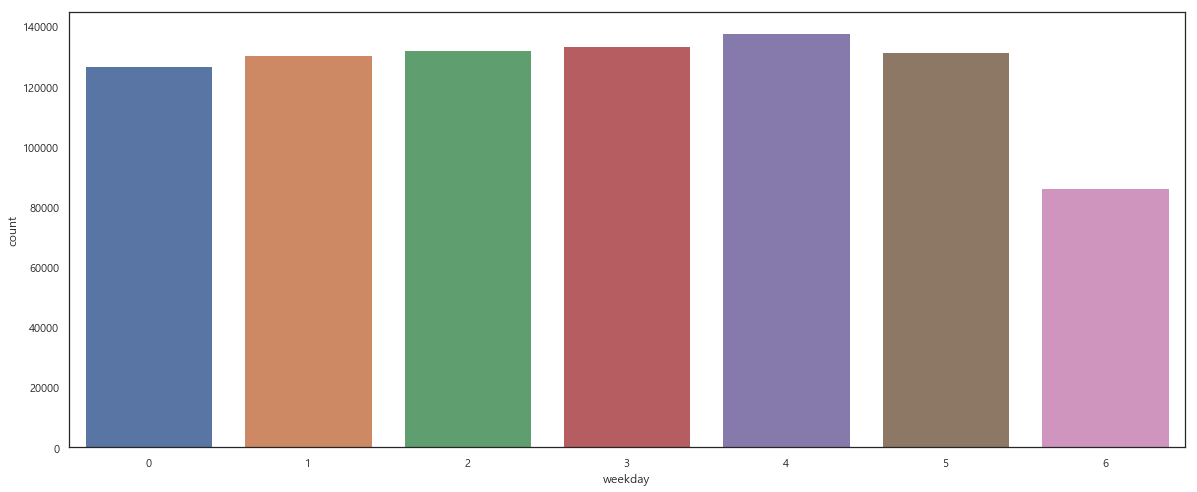

In [714]:
# 요일별 사용량 차트
plt.figure(figsize=(20,8))
sns.countplot(data = parking, x = 'weekday');

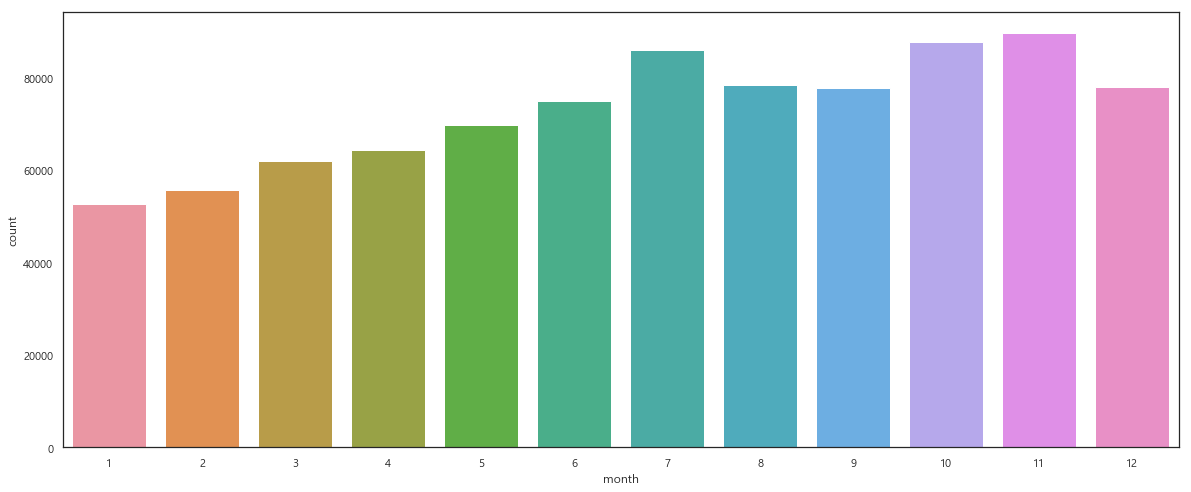

In [715]:
# 월별 사용량 차트
plt.figure(figsize=(20,8))
sns.countplot(data = parking, x = 'month');

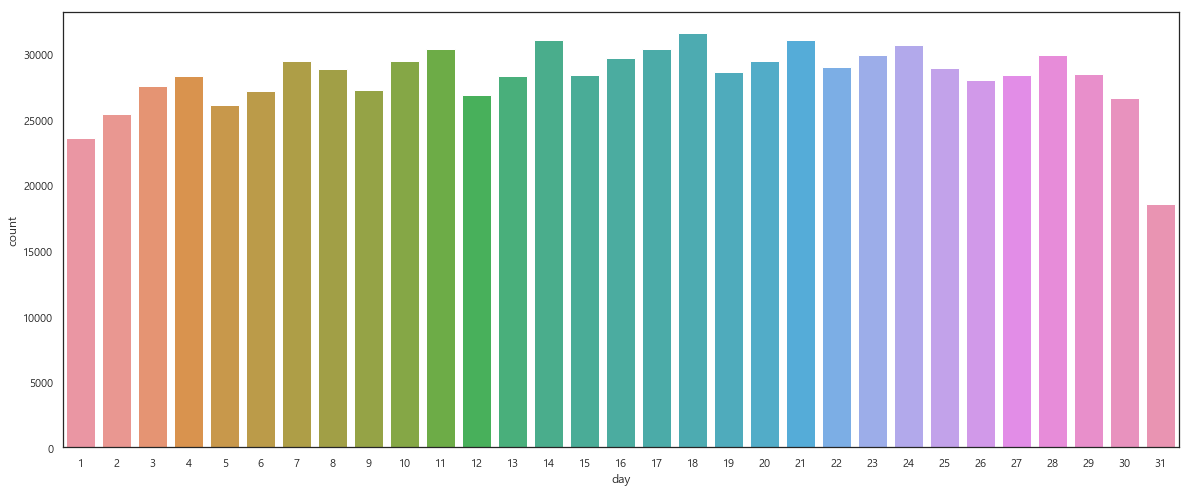

In [716]:
# 일자별 사용량
plt.figure(figsize=(20,8))
sns.countplot(data = parking, x = 'day');

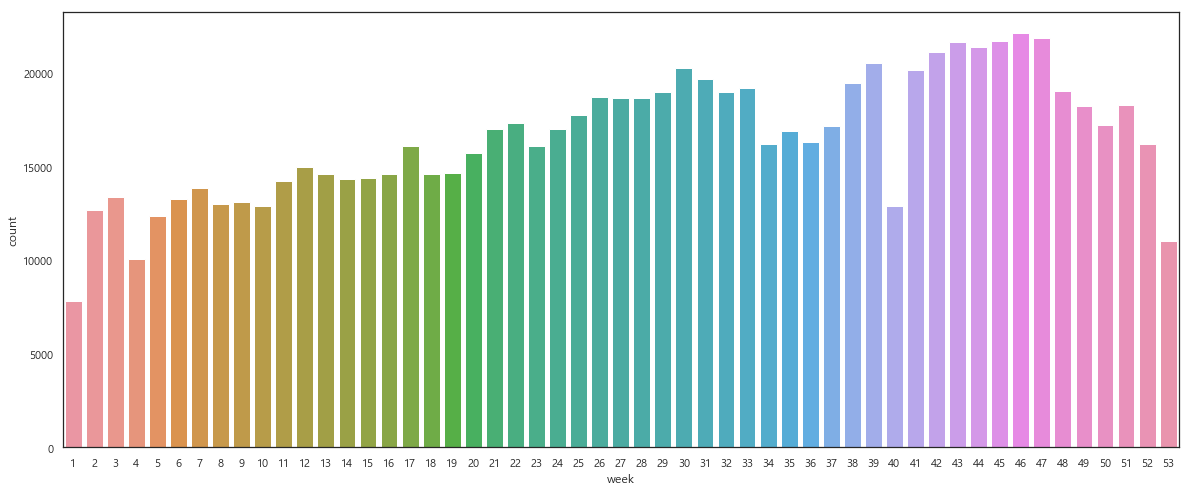

In [717]:
# 주차(week)별 사용량
plt.figure(figsize=(20,8))
sns.countplot(data = parking, x = 'week');

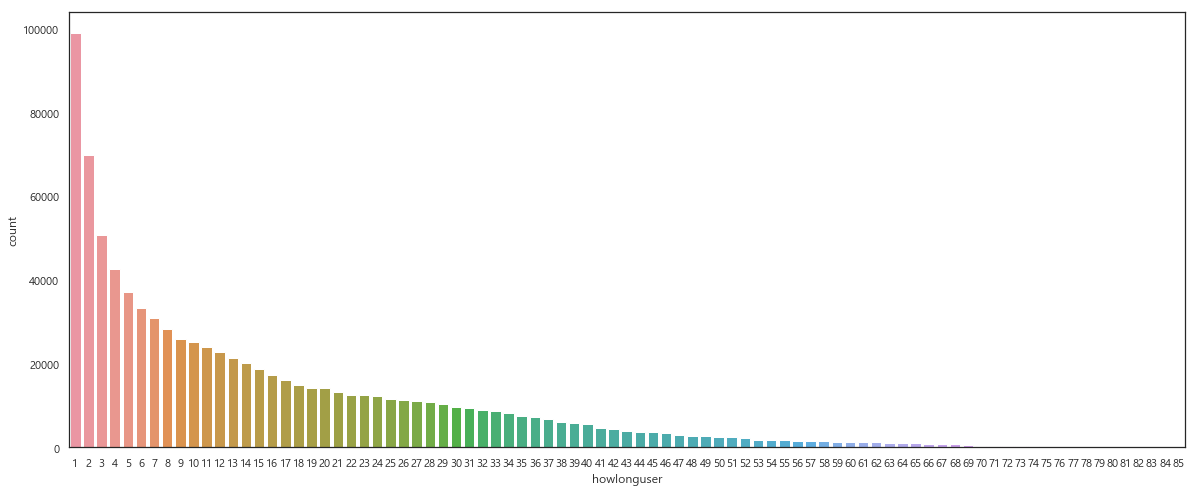

In [718]:
# 유저 가입 기간별 결제량
plt.figure(figsize=(20,8))
sns.countplot(data = parking, x = 'howlonguser');

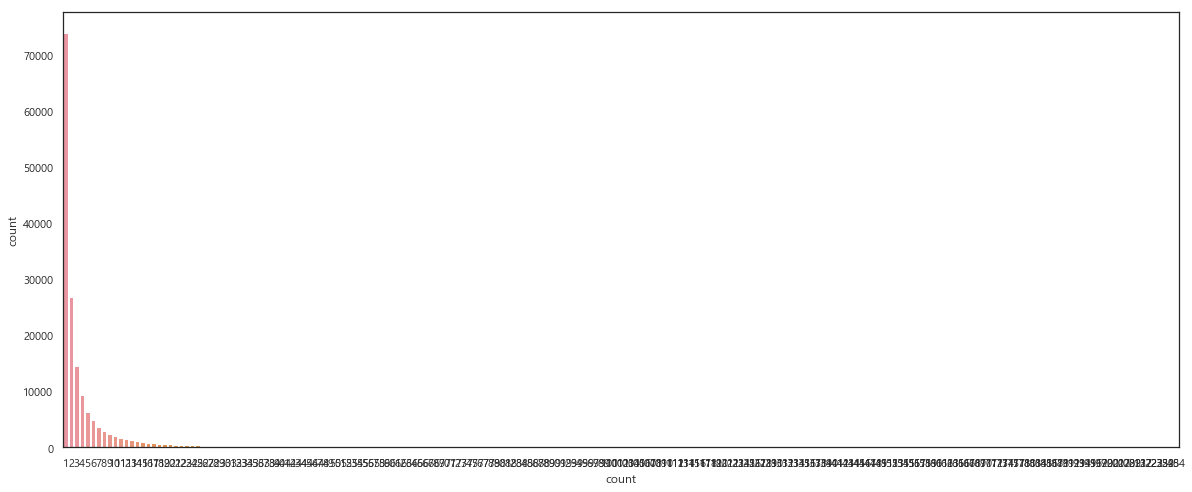

In [719]:
# 유저 id 당 count 횟수 : 약 16만명 회원 중 7만 3천명 정도가 한번만 사용
plt.figure(figsize=(20,8))
df_user = parking.groupby('user_id')['count'].sum().reset_index().sort_values(by = 'count', ascending = False)
sns.countplot(data = df_user, x = 'count');

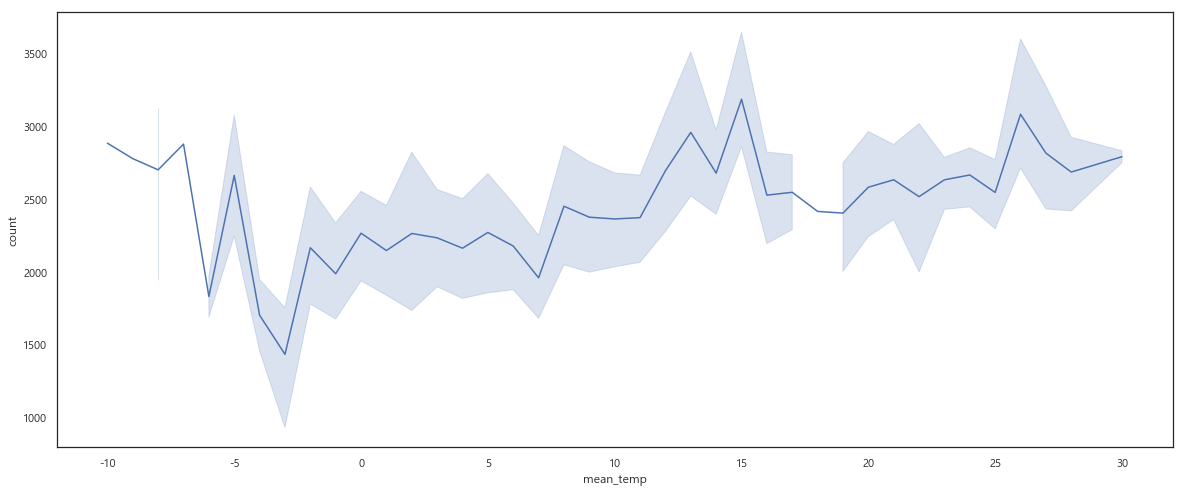

In [720]:
# 평균 온도에 따른 이용량 추이 (평균 온도의 소수점 첫째자리에서 반올림)
plt.figure(figsize=(20,8))
df_m_temp = parking.groupby('mean_temp')['count'].sum().reset_index()
df_m_temp['mean_temp'] = round(df_m_temp['mean_temp'])
sns.lineplot(data = df_m_temp, x = 'mean_temp', y = 'count');

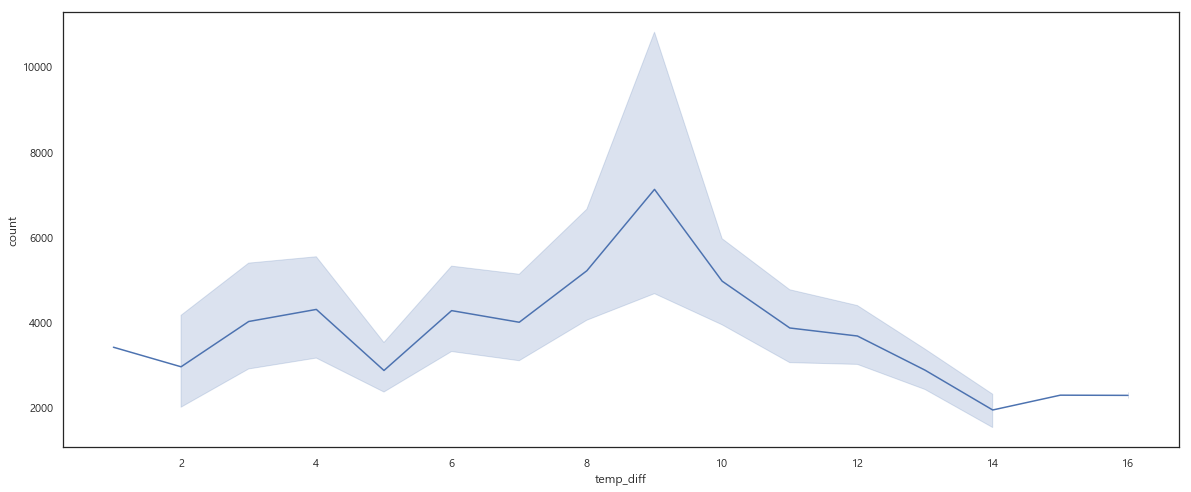

In [721]:
# 일교차에 따른 이용량 추이 (일교차의 소수점 첫째자리에서 반올림)
plt.figure(figsize=(20,8))
df_m_temp = parking.groupby('temp_diff')['count'].sum().reset_index()
df_m_temp['temp_diff'] = round(df_m_temp['temp_diff'])
sns.lineplot(data = df_m_temp, x = 'temp_diff', y = 'count');

### label encoding과 Random Forest Regressor

0. label encoding 전 train, test 데이터 확인. 전체 데이터(parking)의 결측치 재확인
1. 전체 데이터를 가공용 데이터(alldata)로 만들어서 코드 진행. 
2. 문자열 변수의 경우 전체 label encoding 진행
3. alldata를 train, test 데이터의 차원에 맞게 쪼개기
4. 불필요한 변수 제거
5. 예측
6. 예측 평가 MSE, MAE

In [722]:
display(train, test, parking)

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
623574,1709914,2020-09-30,BB,221022,B,2020-09-30,1,GN
623575,1709935,2020-09-30,AA,725,B,2020-09-30,1,MP
623576,1709942,2020-09-30,AA,223058,B,2020-09-30,1,BF
623577,1709950,2020-09-30,BB,182320,A,2020-09-30,2,JRR


,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
623579,15521,2014-09-12,AA,182320,A,2020-10-01,1,JRR
623580,17651,2014-09-19,BB,82434,D,2020-10-01,1,J
623581,26388,2014-10-25,BB,182320,A,2020-10-01,1,JRR
623582,81772,2015-05-02,BB,204438,A,2020-10-01,1,DJ
623583,92258,2015-05-24,AA,220745,A,2020-10-01,1,SD
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,temp_diff,weather,mean_temp,year,month,day,weekday,week,isholiday,howlonguser
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,6,none,-3,2020,1,1,2,1,True,73
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,6,none,-3,2020,1,1,2,1,True,72
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,6,none,-3,2020,1,1,2,1,True,63
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,6,none,-3,2020,1,1,2,1,True,62
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,6,none,-3,2020,1,1,2,1,True,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877807,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,8,none,-9,2020,12,31,3,53,False,1
877808,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,8,none,-9,2020,12,31,3,53,False,1
877809,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,8,none,-9,2020,12,31,3,53,False,1
877810,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,8,none,-9,2020,12,31,3,53,False,1


In [723]:
parking.dtypes

user_id                 int64
join_date      datetime64[ns]
d_type                 object
store_id                int64
goods_type             object
date           datetime64[ns]
count                   int64
ad1                    object
temp_diff             float64
weather                object
mean_temp             float64
year                    int64
month                   int64
day                     int64
weekday                 int64
week                   UInt32
isholiday                bool
howlonguser             int64
dtype: object

In [724]:
parking.isna().sum()

user_id        0
join_date      0
d_type         0
store_id       0
goods_type     0
date           0
count          0
ad1            0
temp_diff      0
weather        0
mean_temp      0
year           0
month          0
day            0
weekday        0
week           0
isholiday      0
howlonguser    0
dtype: int64

In [725]:
alldata = parking

In [726]:
le = LabelEncoder()

cat_cols = alldata.columns[alldata.dtypes == object]
for i in cat_cols:
    alldata[i] = le.fit_transform(alldata[i])

In [727]:
alldata

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,temp_diff,weather,mean_temp,year,month,day,weekday,week,isholiday,howlonguser
0,2858,2014-01-07,0,1892,0,2020-01-01,1,39,6,0,-3,2020,1,1,2,1,True,73
1,5647,2014-02-14,1,182009,0,2020-01-01,1,49,6,0,-3,2020,1,1,2,1,True,72
2,33314,2014-11-20,1,82431,0,2020-01-01,1,63,6,0,-3,2020,1,1,2,1,True,63
3,37001,2014-12-04,1,725,2,2020-01-01,1,52,6,0,-3,2020,1,1,2,1,True,62
4,37819,2014-12-07,0,220691,2,2020-01-01,1,51,6,0,-3,2020,1,1,2,1,True,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877807,1830551,2020-12-31,1,219886,1,2020-12-31,1,39,8,0,-9,2020,12,31,3,53,False,1
877808,1830570,2020-12-31,1,82433,1,2020-12-31,1,19,8,0,-9,2020,12,31,3,53,False,1
877809,1830580,2020-12-31,0,92020,1,2020-12-31,1,51,8,0,-9,2020,12,31,3,53,False,1
877810,1830589,2020-12-31,1,92437,1,2020-12-31,1,49,8,0,-9,2020,12,31,3,53,False,1


In [728]:
# drop columns
# train, test
train2 = alldata[alldata.date <= '2020-09-30']
test2 = alldata[alldata.date > '2020-09-30']

# week를 드랍하는 이유는 우리나라 명절 중 설날, 추석은 음력으로 계산하기 때문에 매년 week값이 바뀌기 때문이다.
train3 = train2.drop(['join_date', 'date', 'year', 'week'], 1)
test3 = test2.drop(['join_date', 'date', 'year', 'week'], 1)

In [729]:
# corrplot
"""
corr = alldata.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()
"""

'\ncorr = alldata.corr()\nmask = np.triu(np.ones_like(corr, dtype=bool))\nf, ax = plt.subplots(figsize=(11, 9))\ncmap = sns.diverging_palette(230, 20, as_cmap=True)\nsns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,\n            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)\nplt.show()\n'

In [730]:
rf = RandomForestRegressor()

In [731]:
%%time
rf.fit(train3, train['count'])
result = rf.predict(test3)
result

C:\Users\hwang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 4.89 s


C:\Users\hwang\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [732]:
MSE = mean_squared_error(result, test['count'])
MAE = mean_absolute_error(result, test['count'])

In [733]:
print('MSE : ', MSE, '\nMAE : ', MAE)

MSE :  2.696894852414485e-05 
MAE :  2.700809068455723e-05


In [734]:
unique, counts = np.unique(result, return_counts=True)
dict(zip(unique, counts))

{1.0: 250760,
 2.0: 4157,
 3.0: 373,
 4.0: 89,
 5.0: 34,
 6.0: 30,
 7.0: 16,
 8.0: 1,
 8.1: 4,
 9.0: 1,
 9.1: 1,
 9.2: 3,
 9.9: 2,
 10.1: 1,
 10.7: 1,
 13.3: 1,
 13.8: 1,
 14.3: 1,
 14.9: 1,
 15.1: 1,
 15.4: 1}

In [735]:
# 앞으로 수행되어야 하는 부분
# EDA 부족
# 불쾌지수
# fit에 log 취하면 개선될 여지가 보임